In [ ]:
# Import all the modules we need 

import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep') 
import matplotlib.style as style
style.use('fivethirtyeight')


from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Data Scaler
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
#import the data 
df = pd.read_csv('nyc-rolling-sales.csv')
print(len(df))
df.head(10)

84548


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,,C4,516 EAST 12TH STREET,...,20,0,20,2581,9730,1900,2,C4,-,7/20/2017 0:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,,C7,520 EAST 14TH STREET,...,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,,D5,141 AVENUE D,...,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,...,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


In [3]:
#updating the borough names
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'


In [4]:
#show data
pd.set_option('display.max_columns',999)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00


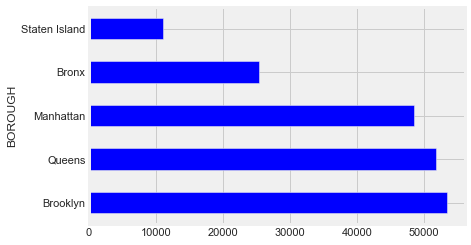

In [5]:
plot = df.groupby('BOROUGH')['TOTAL UNITS'].sum().sort_values(ascending=False)
plot.head()

plot.head().plot(kind='barh', color= 'blue')

In [6]:
#ease_meant and unnamed is empty


del df['EASE-MENT']

del df['Unnamed: 0']

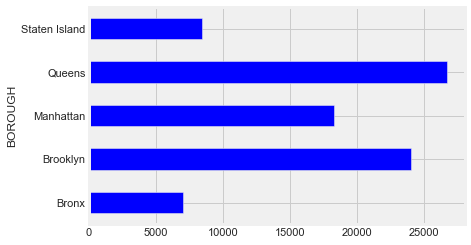

In [7]:

plot = df.groupby('BOROUGH')['TOTAL UNITS'].count()
plot.head()

plot.head().plot(kind='barh', color= 'blue')

In [9]:
#change tax class, sales date, land and gross sq feet and sales price to the correct type

df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

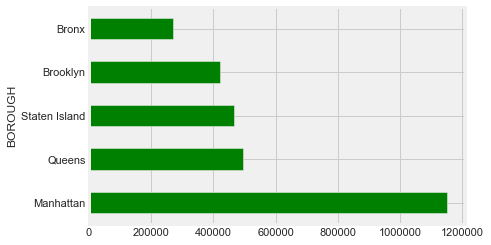

In [10]:
plot = df.groupby('BOROUGH')['SALE PRICE'].median().sort_values(ascending=False)
plot.head()

plot.head().plot(kind='barh', color= 'green')

In [11]:
#removing duplicates 
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [ ]:
#NO DUPLICATES ANYMORE-good job to me

DATA EXPLORATION 

In [12]:
df.info()
df.shape()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
BOROUGH                           83783 non-null object
NEIGHBORHOOD                      83783 non-null object
BUILDING CLASS CATEGORY           83783 non-null object
TAX CLASS AT PRESENT              83783 non-null category
BLOCK                             83783 non-null int64
LOT                               83783 non-null int64
BUILDING CLASS AT PRESENT         83783 non-null object
ADDRESS                           83783 non-null object
APARTMENT NUMBER                  83783 non-null object
ZIP CODE                          83783 non-null int64
RESIDENTIAL UNITS                 83783 non-null int64
COMMERCIAL UNITS                  83783 non-null int64
TOTAL UNITS                       83783 non-null int64
LAND SQUARE FEET                  57729 non-null float64
GROSS SQUARE FEET                 56398 non-null float64
YEAR BUILT                        83783 non-null int6

TypeError: 'tuple' object is not callable

In [13]:
variables = df.columns

count = []

for variable in variables:
    length = df[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(df), 2)

In [14]:
#get rid of the nulls and see how many there are 
df = df[df['SALE PRICE'].notnull()]
len(df)

69607

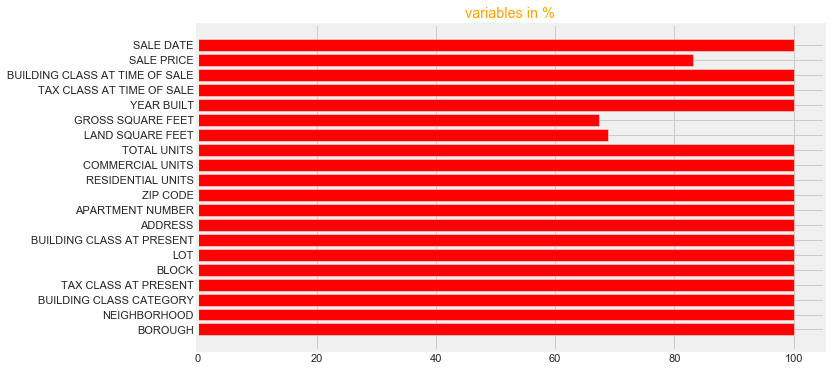

In [15]:
#make bar chart showing variables
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct,  color='red')
plt.title('variables in %', color= "orange")
plt.show()


In [16]:

df.describe

<bound method NDFrame.describe of              BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
11         Manhattan  ALPHABET CITY   
12         Manhattan  ALPHABET CITY   
13         Manhattan  ALPHABET CITY   
14         Manhattan  ALPHABET CITY   
15         Manhattan  ALPHABET CITY   
16         Manhattan  ALPHABET CITY   
17         Manhattan  ALPHABET CITY   
18         Manhattan  ALPHABET CITY   
19         Manhattan  ALPHABET CITY   
21         Manhattan  ALPHABET CITY   
22         Manhattan  ALPHABET CITY   
23         Manhattan  ALPHABET CITY   
24         Manhattan  ALPHABET CITY   
25         Manhattan  ALPHABET CITY   
26         Manhattan  ALPHABET CITY   
27         Manhattan  ALPHABET CITY   
28         Manhattan  ALPHABET CITY   
29         Manhattan  ALPHABET CITY   
31         Manhattan  ALPHABET

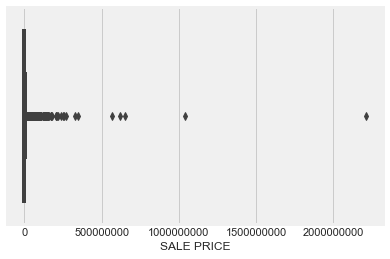

In [17]:
#boxplot ofslae price
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

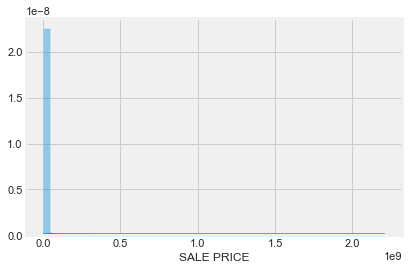

In [18]:
#another graph
sns.distplot(df['SALE PRICE'])

plt.show()

Text(0,0.5,'Sale Price')

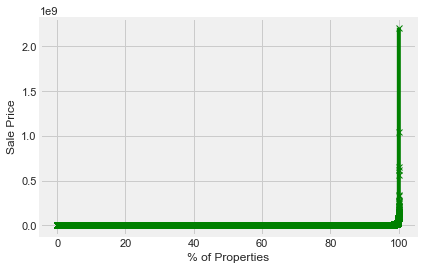

In [19]:

x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
#make it %
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], marker='x', color='green')

plt.xlabel('% of Properties')
plt.ylabel('Sale Price')



In [20]:
#get rid of stuff more than 2 mil and less than 75,000
data = df[(df['SALE PRICE'] > 75000) & (df['SALE PRICE'] < 2000000)]
len(data)

50549

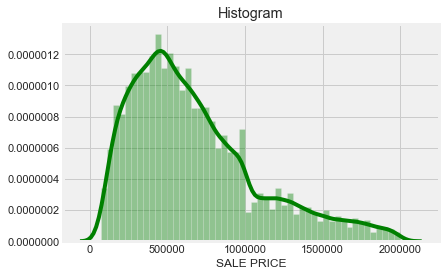

In [21]:
#now that i got rid of the outliers show a histogram 
sns.distplot(data['SALE PRICE'], color= 
        'green')
plt.title('Histogram')

plt.show()

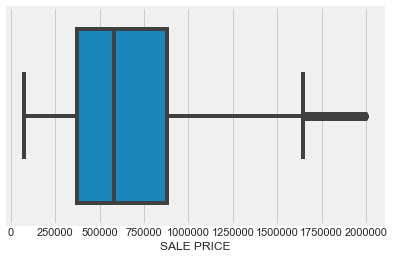

In [22]:
#ok so in this what is in what quartile
sns.boxplot(x='SALE PRICE', data=data)


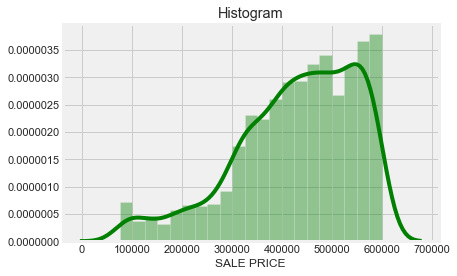

In [23]:
#lets look only at manhattan and what I can afford (<600,000)

data_manhattan = data[data.BOROUGH == "Manhattan"]
data_icanafford = data_manhattan[(data_manhattan['SALE PRICE'] <600000)]
sns.distplot(data_icanafford['SALE PRICE'], color= 'green')
plt.title('Histogram')

plt.show()

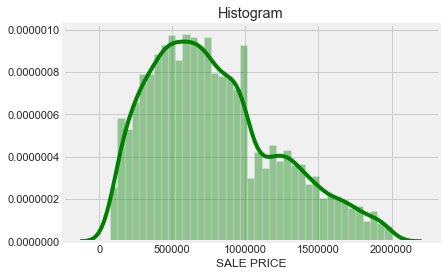

In [24]:
data_brooklyn = data[data.BOROUGH == "Brooklyn"]
sns.distplot(data_brooklyn['SALE PRICE'], color= 'green')
plt.title('Histogram')

plt.show()

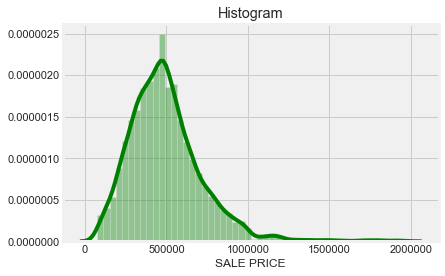

In [25]:
data_SI= data[data.BOROUGH == "Staten Island"]
sns.distplot(data_SI['SALE PRICE'], color= 'green')
plt.title('Histogram')

plt.show()


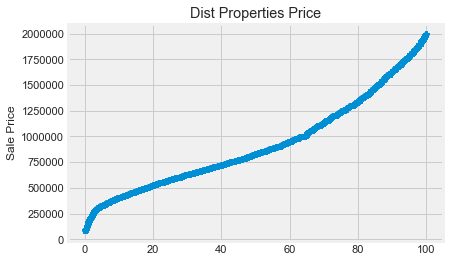

In [26]:
#really i only care about manhattan that i can afford (data_manhattan)
#Get the data and format it
x = data_manhattan[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100* x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Plot the data
plt.plot(x['PROPERTY PROPORTION'],x['SALE PRICE'], marker='*')
plt.title('Dist Properties Price')

plt.ylabel('Sale Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [27]:
#to make life easy i am going to call the data set I am looking at data
data=data_manhattan

In [28]:
variables = data.columns

count = []

for variable in variables:
    length = data[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(data), 2)

<BarContainer object of 20 artists>

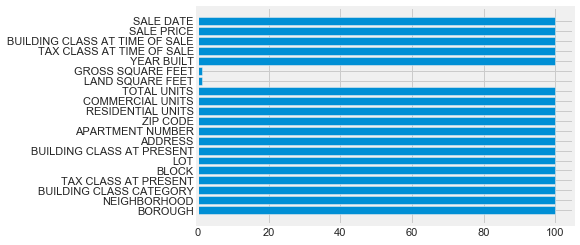

In [29]:
plt.barh(variables, count_pct)



In [30]:
# remove null from the sq feet variables
data = data[data['LAND SQUARE FEET'].notnull()] 
data = data[data['GROSS SQUARE FEET'].notnull()] 

Text(0.5,1,'Gross ^2 ft vs Sale Price')

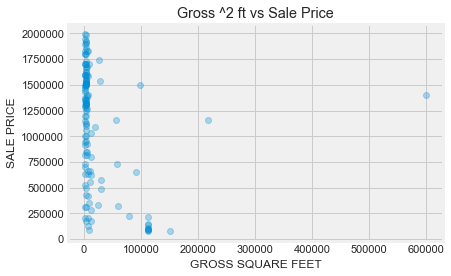

In [31]:
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross ^2 ft vs Sale Price')

Text(0.5,1,'Land ^2 Ft vs Sale Price')

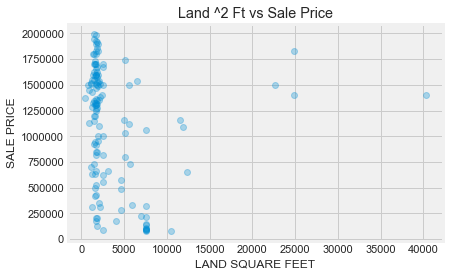

In [32]:
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land ^2 Ft vs Sale Price')


In [33]:
# removing things above 25000 cause that is really big(wont ever happen), are outliers will change how things look
data = data[data['GROSS SQUARE FEET'] < 25000]
data = data[data['LAND SQUARE FEET'] < 25000]

Text(0.5,1,'Gross ^2 ft vs Sale Price')

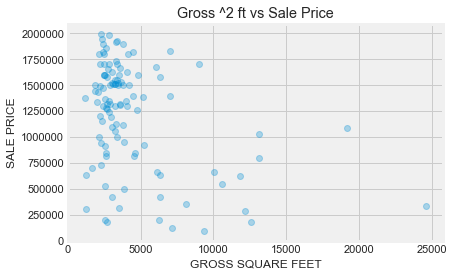

In [34]:
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Gross ^2 ft vs Sale Price')

Text(0.5,1,'Land ^2 Ft vs Sale Price')

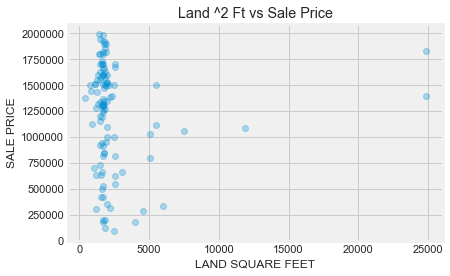

In [35]:
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land ^2 Ft vs Sale Price')


In [36]:
#remove 0 units and things where residential and total units do not match
data = data[(data['TOTAL UNITS'] > 0)]
data = data[data['TOTAL UNITS'] == data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']]

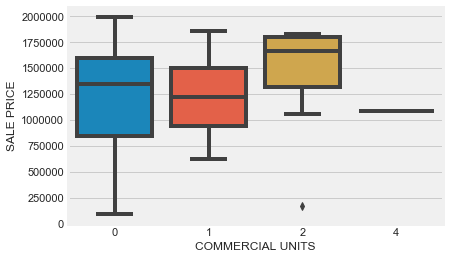

In [37]:
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=data)

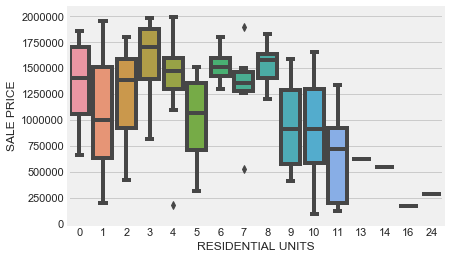

In [38]:
# only 2 units- ok thats fine i guess- now lets see for residential
sns.boxplot(x='RESIDENTIAL UNITS', y='SALE PRICE', data=data)

In [39]:
#next variable- year built- remove things that are very below year 1000(aka arent years that exist)
data = data[data['YEAR BUILT'] > 1000]


In [40]:
#find out hpw long the building has been around for ( find a way to put in the current year)
data['Age of building'] = 2018 - data['YEAR BUILT']
#print(data['Age of building'])

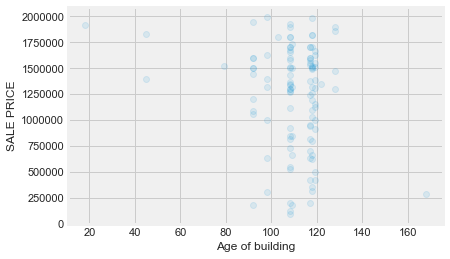

In [41]:
# looking at building age and price
sns.regplot(x='Age of building', y='SALE PRICE', data=data, fit_reg=False, scatter_kws={'alpha':0.1})

In [42]:
# so age might have something to do with this

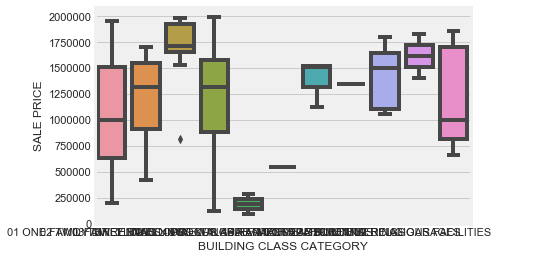

In [43]:

order = sorted(data['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=data, order=order)#look at bulding class cat

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

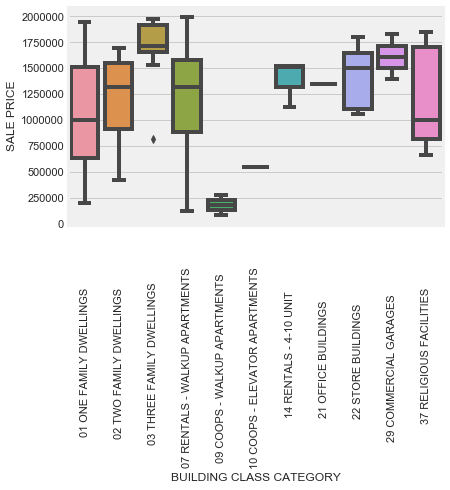

In [44]:
# cant read anything- change direction of xticks
order = sorted(data['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=data, order=order)
plt.xticks(rotation=90)


In [45]:
# most expensive is 3 fam,coop walk up are in the cheapest range

In [46]:
#doing corr matrix
d= data[['TOTAL UNITS','GROSS SQUARE FEET','SALE PRICE', 'Age of building', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS', 
         'COMMERCIAL UNITS']]
corr = d.corr()

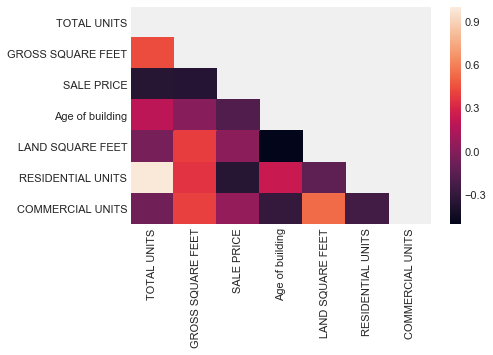

In [47]:
#make a heat map and mask first
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)


In [48]:
#those are correlation- use the high ones (orange and red ones)

In [74]:
#gonna use sckit but need to dummy the categorical variables and have to normalize stuff
columns = [ 'BUILDING CLASS CATEGORY', 'COMMERCIAL UNITS','GROSS SQUARE FEET',
       'SALE PRICE', 'Age of building', 'LAND SQUARE FEET', 'RESIDENTIAL UNITS']
data_model = data[columns]

In [75]:
#relevnt cat variable
features = [ 'BUILDING CLASS CATEGORY']

# number of col are adding to the dataset
longest_str = max(features, key=len)
total_num_unique_categorical = 0
#make a looop
for f in features:
    num_unique = len(data[f].unique())
    print(num_unique)

11


In [76]:
# so we will be adding 11 col to the current data set 

In [52]:
#now turning cat data into dummy
dummy= pd.get_dummies(data_model[features])
dummy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 222 to 18026
Data columns (total 11 columns):
BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS                        110 non-null uint8
BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS                        110 non-null uint8
BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS                      110 non-null uint8
BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS                 110 non-null uint8
BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS                   110 non-null uint8
BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS                 110 non-null uint8
BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT                         110 non-null uint8
BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS                            110 non-null uint8
BUILDING CLASS CATEGORY_22 STORE BUILDINGS                             110 non-null uint8
BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES                          110 non-nu

In [53]:
data_model = data_model.drop(features, axis=1)


data_model = pd.concat([data_model, dummy], axis=1)
#show head
data_model.head()

,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Age of building,LAND SQUARE FEET,RESIDENTIAL UNITS,BUILDING CLASS CATEGORY_01 ONE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES
222,0,6330.0,1583840.0,117,1566.0,9,0,0,0,1,0,0,0,0,0,0,0
223,0,6330.0,416790.0,117,1566.0,9,0,0,0,1,0,0,0,0,0,0,0
224,0,6330.0,630370.0,117,1566.0,9,0,0,0,1,0,0,0,0,0,0,0
277,0,12200.0,282000.0,168,4600.0,24,0,0,0,0,1,0,0,0,0,0,0
4173,0,1152.0,1375000.0,117,384.0,1,1,0,0,0,0,0,0,0,0,0,0


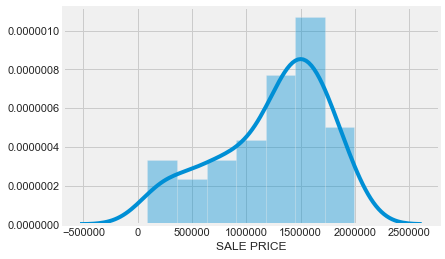

In [54]:
sns.distplot(data_model['SALE PRICE']) #sales price vs the modle i just made

In [66]:
# data_model[['SALE PRICE']]

In [83]:
#normalize it

data_model['SALE PRICE'] = StandardScaler().fit_transform(data_model[['SALE PRICE']])






In [77]:
data_model.describe()


,COMMERCIAL UNITS,GROSS SQUARE FEET,SALE PRICE,Age of building,LAND SQUARE FEET,RESIDENTIAL UNITS
count,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000
mean,0.309091,4181.454545,1.235517e+06,109.236364,2463.209091,4.809091
std,0.687309,2957.640529,5.006568e+05,16.575060,3358.148860,4.125320
min,0.000000,1152.000000,9.000000e+04,18.000000,384.000000,0.000000
25%,0.000000,2545.500000,9.148450e+05,108.000000,1566.000000,2.000000
50%,0.000000,3226.500000,1.350000e+06,109.000000,1699.000000,4.000000
75%,0.000000,4409.250000,1.600000e+06,118.000000,1999.500000,7.750000
max,4.000000,19186.000000,1.995000e+06,168.000000,24875.000000,24.000000


In [78]:
#ok got a bunch of error, cannot do log of zero so add 1
data_model['COMMERCIAL UNITS'] = data_model['COMMERCIAL UNITS'] + 1
data_model['RESIDENTIAL UNITS'] = data_model['RESIDENTIAL UNITS'] + 1
data_model['GROSS SQUARE FEET'] = data_model['GROSS SQUARE FEET'] + 1
data_model['LAND SQUARE FEET'] = data_model['LAND SQUARE FEET'] + 1
data_model['Age of building'] = data_model['Age of building'] + 1


In [85]:
#so now standardize all of the things above

data_model['COMMERCIAL UNITS'] = StandardScaler().fit_transform(data_model[['COMMERCIAL UNITS']])

data_model['RESIDENTIAL UNITS'] = StandardScaler().fit_transform(data_model[['RESIDENTIAL UNITS']])

data_model['GROSS SQUARE FEET'] =StandardScaler().fit_transform(data_model[['GROSS SQUARE FEET']])
data_model['LAND SQUARE FEET'] = StandardScaler().fit_transform(data_model[['LAND SQUARE FEET']])


data_model['Age of building'] = StandardScaler().fit_transform(data_model[['Age of building']])



In [86]:
#train/test remebe want these scores to be close to each other

training, testing = train_test_split(data_model, test_size=0.3, random_state=0)
print(data_model.shape[0],training.shape[0],testing.shape[0])

110 77 33


In [92]:
df_train_s = training.loc[:,data_model.columns]
X_train_s = df_train_s.drop(['SALE PRICE'], axis=1)
y_train_s = df_train_s.loc[:, ['SALE PRICE']]

df_test_s = testing.loc[:,data_model.columns]
X_test_s = df_test_s.drop(['SALE PRICE'], axis=1)
y_test_s = df_test_s.loc[:, ['SALE PRICE']]

In [90]:
#run models and figure out which one to do (we know linear is bad cause alex/ben told us but its really the only one I know how to do so Ill probbaly still do it )
linreg = LinearRegression()

# Fit the regressor to the training data
linreg.fit(X_train_s, y_train_s)

# Predict the labels of the test set: y_pred
y_pred_s = linreg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(linreg, X_train_s, y_train_s, cv=5)

ValueError: could not convert string to float: '07 RENTALS - WALKUP APARTMENTS             '

In [91]:
print("R^2: {}".format(linreg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [93]:
#random forset b/c cat 
rf_reg = RandomForestRegressor()

rf_reg.fit(X_train_s, y_train_s)

y_pred_s_rf = rf_reg.predict(X_test_s)

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_rf = cross_val_score(rf_reg, X_train_s, y_train_s, cv=5)


ValueError: could not convert string to float: '07 RENTALS - WALKUP APARTMENTS             '

In [94]:
print("R^2: {}".format(rf_reg.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_rf))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rf)))
# Print the 5-fold cross-validation scores
print(cv_scores_rf)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [95]:

variable_importance = pd.DataFrame(list(zip(X_train_s.columns, np.transpose(rf_reg.feature_importances_))) \
            ).sort_values(1, ascending=False)
variable_importance

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [96]:
#the tree
variable_importances = rf_reg.feature_importances_

std = np.std([tree.feature_importances_ for tree in rf_reg.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Ploting
plt.figure()

plt.bar(range(X_train_s.shape[1]), importances[indices],  
       color="g")
plt.xticks(range(X_train_s.shape[1]),X_train_s.columns[indices])

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [97]:
#ridge regression- with alpha

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()


In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alphas and ridge score
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

#nrmaliza
ridge = Ridge(normalize=True)

# loop
for alpha in alpha_space:

    ridge.alpha = alpha
    
    # 10-fold CV
    ridge_cv_scores = cross_val_score(ridge, X_train_s, y_train_s, cv=10)
    
    # mean of ridge_cv_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std 
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

ValueError: could not convert string to float: '07 RENTALS - WALKUP APARTMENTS             '

In [99]:
ridge = Ridge(alpha=0.01, normalize=True)


ridge.fit(X_train_s, y_train_s)

#Predict
y_pred_s_ridge = ridge.predict(X_test_s)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X_train_s, y_train_s, cv=5)
print("R^2: {}".format(ridge.score(X_test_s, y_test_s)))
rmse = np.sqrt(mean_squared_error(y_test_s, y_pred_s_ridge))
print("Root Mean Squared Error: {}".format(rmse))

print("Average 5-Fold CV Score: {}".format(np.mean(ridge_cv)))
# Print the 5-fold cross-validation scores
print(ridge_cv)

ValueError: could not convert string to float: '07 RENTALS - WALKUP APARTMENTS             '